##**Notes/reminders:**

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* Version used in the code below: 
- Python version: 3.11.7
- scikit-learn version: 1.2.2
- imbalanced-learn version: 0.12.1
- scikit-optimize version: 0.10.1

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

## Dictionary:
* In column: SEX
 * M = 0
 * F = 1

* In column: HAM/TSP
* No myelopathy = 0
* HAM/TSP = 1

# **Categorized data_1:**
named as = cat_data_1

Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and categorization of pain subtypes. Including the conversion of "Hipereflexia" and "Hiperflexia em MMII", como somente "Hipereflexia.

Dictionary:
- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

- Weakenes:
 - normal levels of strength: 0
 - weakness or lost of stregth: 1

- Wandering:
 - normal walking: 0
 - abnormal walking: 1

At this point, df is the new data set with the change in the selected characteristics

# **Categorized data_2:**
named as = cat_data_2

- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

The presence of any of the following variables resulted in the dataset being converted to 1:
 - diabetes
 - obesity
 - diabetes
 - osteoporosis
 - chronic kidney disease
 - Hypothyroidism
 - arthrosis
 - hypertension
 - arthrosis/ diabetes/hypertension
 - arthrosis/diabetes/hypertension

- Mental disorders:
The presence of any of the following variables resulted in the dataset being converted to 2:
 - psychotic breaks/compulsive crises
 - insomnia
 - outbreaks/insomnia/crisis
 - schizophrenia
 - anxiety
 - psychiatric illness
 - anxiety/depression
 - depression


- Neurological disorder/symptoms:
The presence of any of the following variables resulted in the dataset being converted to 1:
 - Paresthesia
 - Weakness
 - Numbness
 - Hypermotility

- The presence of any of the following variables resulted in the dataset being converted to 2:
 - Paresis
 - Hypereflexia
 - Spasticity
 - Gait (related to locomotion problems)

In the event of the presence of the above-mentioned symptoms associated with the disorders, the sample was converted into 2


#**Categorized data_3:**
named as = cat_data_3

 Urinary symptoms:
- Polyuria: 1 +
- Dysuria: 2
- Urinary incontinence: 3
- Nocturia: 4 +

Pain:
- non-specific pain: 1
- Joint pain: 2
- Lower back pain: 3
- lower limb pain: 4
- Lower limb pain + other site of pain: 5

Neurological disorder/symptoms: The presence of any of the following variables caused the data set to be converted into the respective numbers described below:
- Paresthesia: 1 
- Paresis/weakness/loss of strength: 2 
- Hypereflexia: 3 
- Paresthesia/hypereflexia: 4 
- Paresis/paresthesia: 5 
- Spasticity: 6 
- Hypereflexia/spasticity or gait: 7 
- Paresis/spasticity or gait: 8 
- Neurogenic bladder: 9
- Neurogenic bladder+Paresthesia: 10
- Neurogenic bladder+paresis: 11

Mental disorders:
The presence of any of the following variables caused the data set to be converted into the respective numbers described below:
 - Psychotic breaks/compulsive crises: 1
 - Insomnia: 2
 - Outbreak/insomnia/crisis: 3
 - Schizophrenia: 4
 - Anxiety: 5
 - Psychiatric illness: 6
 - Anxiety/depression: 7
 - Depression : 8

Chronic diseases:
 - Diabetes: 1
 - Obesity: 2
 - Diabetes/Obesity: 3
 - Osteoporosis: 4
 - Chronic kidney disease: 5
 - Hypothyroidism: 6
 - Arthrosis: 7
 - Arthrosis/diabetes: 8
 - Hypertension: 9
 - Arthrosis/diabetes/hypertension: 10
 - Arthrosis/diabetes/hypertension: 11




# **Loading data and packages**

**Libraries import**

In [27]:
import os
import warnings
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, ttest_ind
from joblib import dump, load
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from ipywidgets import interact, widgets

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import ipywidgets as widgets
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, LeaveOneOut, cross_validate
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.metrics import geometric_mean_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact
from imblearn.pipeline import Pipeline as ImbPipeline


from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, LeaveOneOut, cross_validate
)
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.metrics import geometric_mean_score
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import os
import shutil
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data selection
inicial_dataset = ('..\\datasets\\Clean_data_HAM_TSP.csv')
cat_data_1 = ('..\\datasets\\df_cat.csv')
cat_data_2 = ('..\\datasets\\df_cat_2.csv')
cat_data_3 = ('..\\datasets\\df_cat_3.csv')

# Ignoring warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
# Defining a global variable to store the DataFrame
df = pd.DataFrame()

# Function to load and process the selected dataset
def load_and_process_data(selected_data):
    global df
    if selected_data == 'Categorical Data 3':
        df = pd.read_table(cat_data_3, sep=',')
        df['Sex'] = df['Sex'].replace('M', 0)
        df['Sex'] = df['Sex'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)
        df = df.drop(['NUM AMO'], axis=1)
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

    else:
        df = pd.DataFrame()
    print("Data Loaded and Processed Successfully!")
    return df.head()  # Shows the first rows of the loaded and processed dataset

# List of dataset options
data_options = ['Categorical Data 3']

# Selection widget to choose the data set
data_selector = widgets.Dropdown(
    options=data_options,
    description='Select Data:'
)

# Interactive function to load and process the selected data set
@interact(selected_data=data_selector)
def load_and_process_selected_data(selected_data):
    return load_and_process_data(selected_data)


interactive(children=(Dropdown(description='Select Data:', options=('Categorical Data 3',), value='Categorical…

In [29]:
print(df)

     Sex  Age  HAM/TSP  MBL-550  MBL -221  MBL EXON  Urinary symptoms  Pain  \
0      0   68        0        1         0         2                 2     4   
1      1   32        0        0         0         1                 0     0   
2      0   54        0        2         1         0                 0     0   
3      0   36        0        1         0         0                 0     0   
4      0   41        0        1         1         1                 0     0   
..   ...  ...      ...      ...       ...       ...               ...   ...   
148    1   76        0        2         0         0                 0     0   
149    1   63        0        1         0         0                 0     2   
150    1   82        0        1         0         0                 0     2   
151    0   62        0        2         0         0                 0     1   
152    1   53        0        2         0         0                 0     1   

     Neurological disorder/symptoms   Neuropathy  C

# **Exploratory analysis**


**Target frequency distribution (HAM/TSP)**

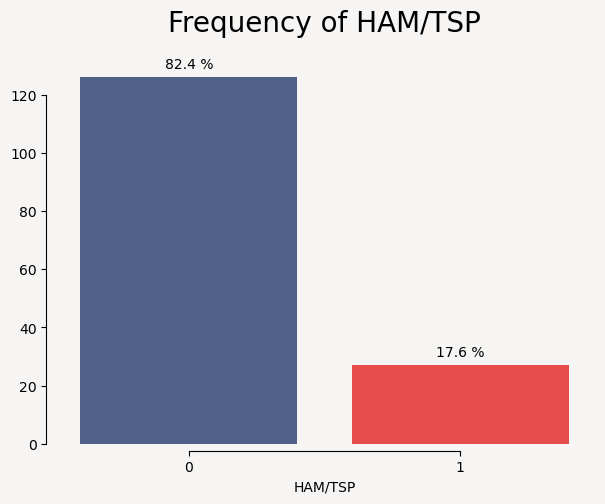

In [9]:
# Color palette
mypal = ['#465d91', '#FFFFE0', '#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center")

ax.set_title('Frequency of HAM/TSP', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in JPEG
plt.savefig('..\\exploratory_analysis\\Freq_HAM_TSP.jpeg')

# Show the graphic
plt.show()

**Pearson correlation matrix initial dataset (heatmap):**

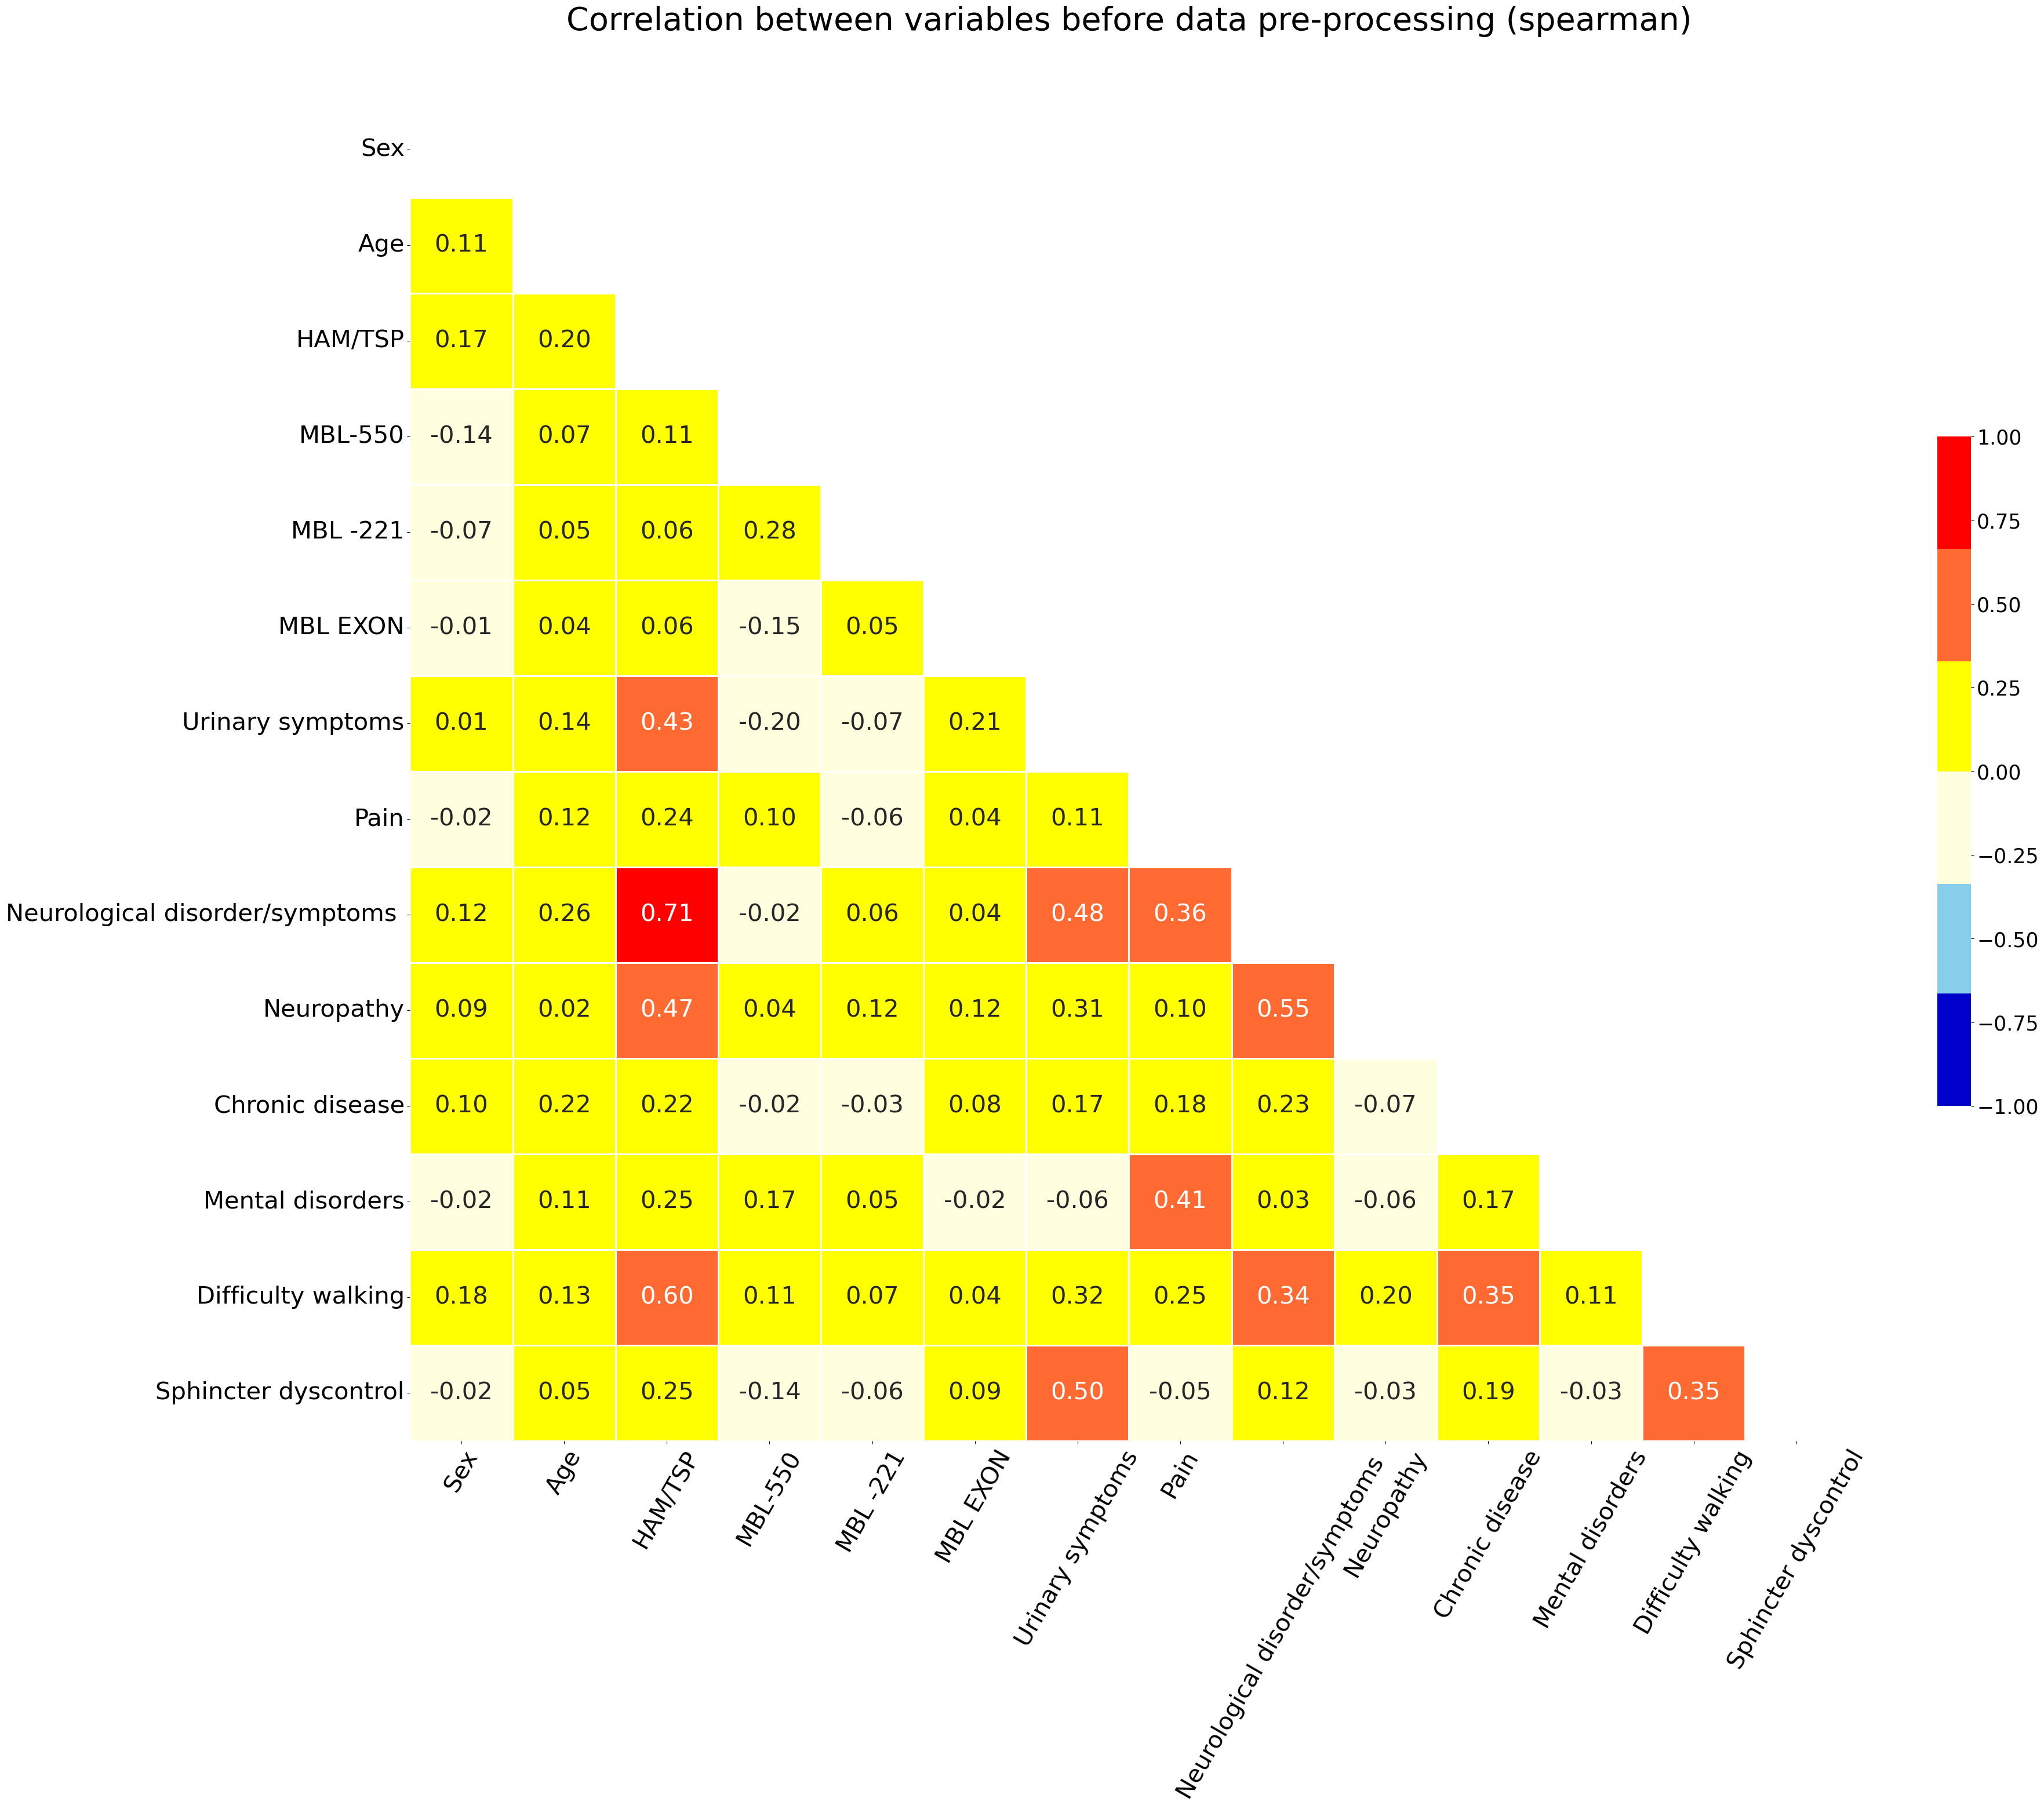

In [10]:
mypal = ['#0000CD', '#87CEEB', '#FFFFE0', '#FFFF00', '#ff6a32', '#FF0000']
metodo_correlacao = "spearman"
df_ = df

corr = df_.corr(method=metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)

# Create heatmap
heatmap = sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=1.0, 
    vmin=-1.0, 
    center=0, 
    annot=True,
    square=False, 
    linewidths=1, 
    cbar_kws={"shrink": 0.5}, 
    fmt='.2f', 
    annot_kws={"size": 30}
)

# Adjusts of the plot
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)  
plt.yticks(rotation=0, fontsize=30)
plt.xticks(rotation=60, fontsize=30)
ax.set_title(
    "Correlation between variables before data pre-processing (" + metodo_correlacao + ")", 
    fontsize=40, 
    y=1.05
)

# Save the graph in jpeg
plt.savefig('../exploratory_analysis/' + 'initial_df_plot_heatmap_corr_pearson.jpeg')

plt.show()


**Linear regression**

In [11]:
y = df['HAM/TSP']  # Target variable
X = df.drop('HAM/TSP', axis=1)  # Predictor variables

# Add a constant to DataFrame X to adjust the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Obtain the p-values for each independent variable
p_values = model.pvalues

print(p_values)

const                              7.296953e-01
Sex                                6.565907e-01
Age                                9.047988e-01
MBL-550                            5.199580e-02
MBL -221                           3.503602e-01
MBL EXON                           7.176807e-01
Urinary symptoms                   7.569090e-01
Pain                               7.250223e-01
Neurological disorder/symptoms     6.002104e-10
Neuropathy                         1.751511e-02
Chronic disease                    6.440645e-01
Mental disorders                   5.458061e-03
Difficulty walking                 6.909262e-07
Sphincter dyscontrol               5.782415e-01
dtype: float64


In [13]:
# Count the total number of patients with HAM/TSP in relation to DataFrame 'y'
pacientes_com_HAM_feminino = ((df['Sex'] == 1) & (df['HAM/TSP'] == 1)).sum()
print(f'Female patients with HAM/TSP: {pacientes_com_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_com_HAM_masculino = ((df['Sex'] == 0) & (df['HAM/TSP'] == 1)).sum()
print(f'Male patients with HAM/TSP: {pacientes_com_HAM_masculino}')

# Count the total number of female patients without HAM/TSP
pacientes_sem_HAM_feminino = ((df['Sex'] == 1) & (df['HAM/TSP'] == 0)).sum()
print(f'Female patients without HAM/TSP: {pacientes_sem_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_sem_HAM_masculino = ((df['Sex'] == 0) & (df['HAM/TSP'] == 0)).sum()
print(f'Male patients without HAM/TSP: {pacientes_sem_HAM_masculino}')

Female patients with HAM/TSP: 21
Male patients with HAM/TSP: 6
Female patients without HAM/TSP: 71
Male patients without HAM/TSP: 55


**T-student**
- Evaluation of the relationship between the independent variables and the target outcome


In [23]:
# List to store the characteristics that pass the t-test and their p-values
selected_features_ttest = []

# Define the characteristics (excluding the 'HAM/TSP' class column)
features = [col for col in df.columns if col != 'HAM/TSP']

# Iterate through the characteristic columns
for feature in features:
    # Extract data for each class
    class_0 = df.loc[df['HAM/TSP'] == 0, feature]
    class_1 = df.loc[df['HAM/TSP'] == 1, feature]

    # Perform the t-test
    _, p_value = ttest_ind(class_0, class_1)

    # If the p-value is less than a threshold (e.g. 0.05), consider the characteristic significant
    if p_value < 0.05:
        selected_features_ttest.append((feature, p_value))

# DataFrame with only the characteristics selected by the t-test
selected_features_names = [feature for feature, p_value in selected_features_ttest]
df_selected = df[selected_features_names]

# Target directory
destination_dir = '..\\exploratory_analysis\\'
print(f'Out of {len(features)} features, {len(selected_features_ttest)} were selected by the t-test: ')
with open('T-student_exploratory_Analysis.txt', 'w') as arquivo:
    for feature, p_value in selected_features_ttest:
        print(f'- {feature} (p-value: {p_value:.5f})', file=arquivo)

# Copy the file to the destination directory
shutil.copyfile('T-student_exploratory_Analysis.txt', os.path.join(destination_dir, 'T-student_exploratory_Analysis.txt'))


Out of 13 features, 10 were selected by the t-test: 


'..\\exploratory_analysis\\T-student_exploratory_Analysis.txt'

# **Feature selection**

**Definition of variables and models**

In [30]:
# Classifiers definition
classifiers = {
    "DT": DecisionTreeClassifier(random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "LR": LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "NB": GaussianNB(),
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(2),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LSVM": LinearDiscriminantAnalysis()
}

# List of model names that have been adjusted
model_name = ['DT', 'GB', 'LR', 'MLP', 'NB', 'RF', 'SVM', 'KNN', 'AdaBoost', 'LSVM']


y = df['HAM/TSP']  # Target variable
X = df.drop('HAM/TSP', axis=1)  # Predictor variables

**Pre-processing**


In [16]:
# # Handling unbalanced data
# Create an instance of RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Adjust RandomUnderSampler to your X and y data
X_resampled, y_resampled = under_sampler.fit_resample(X, y)
X_train_resampled_all = X_resampled


# Data scaling
scaler = MinMaxScaler()

# Adjust and transform the "data" column using the scaler
X_train_resampled_all['Age'] = scaler.fit_transform(X_train_resampled_all[['Age']])

# Now, X_train_resampled_all['data'] contains the scaled data in the 'data' column
X = X_train_resampled_all

**Feature selection (K-best)**

In [18]:
# Initialize list to store all results
all_results = []

# Initialize dictionary to store selected features for each k
selected_features_dict = {}

# Select directory to save exploratory analysis
destination_dir = '..\\exploratory_analysis\\'

# Test different values of "k" for SelectKBest
for k in range(1, X_train_resampled_all.shape[1] + 1):
    # Selecionar as melhores "k" características
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_resampled_all, y_resampled)
    selected_features = X_train_resampled_all.columns[selector.get_support()]

    # Store selected features in the dictionary
    selected_features_dict[k] = selected_features.tolist()

    # Initialize list to store results for each classifier
    resultados = []

    # Iterate over the classifiers
    for nome in model_name:
        item = classifiers[nome]  # Obter o classificador pelo nome
        # Create and train the model
        item.fit(X_train_selected, y_resampled)

        # Making predictions
        y_pred = item.predict(X_train_selected)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_resampled, y_pred).ravel()

        # Calculate sensitivity and specificity
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Calculate G-mean
        g_mean = np.sqrt(sensitivity * specificity)

        resultados.append((nome, g_mean))

    all_results.append((k, resultados))

# Create a DataFrame to store the results
df_results = pd.DataFrame(columns=["k"] + model_name)

# Add the results to the DataFrame
for k, resultados in all_results:
    g_means = [g_mean for _, g_mean in resultados]
    df_results.loc[k] = [k] + g_means

# Calculate the average of each row, excluding the first column ("k")
df_results["G-mean"] = df_results.iloc[:, 1:].mean(axis=1)

# Select the five lines with the highest averages
top_5_mean = df_results.nlargest(5, "G-mean")

# Create an Excel file
wb = Workbook()

# Add the first tab with the results
ws1 = wb.active
ws1.title = "Resultados"

# Add the results to Excel
for r in dataframe_to_rows(df_results, index=True, header=True):
    ws1.append(r)

# Create the second tab for the five lines with the highest averages
ws2 = wb.create_sheet(title="Top 5 Médias")

# Add the results to Excel for top 5 mean
for r in dataframe_to_rows(top_5_mean, index=True, header=True):
    ws2.append(r)

# Create a new tab for selected features for all values of k
ws_features = wb.create_sheet(title="Selected Features")

# Add the headers for selected features
headers = ["k"] + [f"Feature_{i}" for i in range(1, X_train_resampled_all.shape[1] + 1)]
ws_features.append(headers)

# Add the selected features for each k to the Excel sheet
for k, features in selected_features_dict.items():
    row_data = [k] + features
    ws_features.append(row_data)

# Save the Excel file
feature_selection = "resultados_feature_selection.xlsx"
wb.save(feature_selection)


# Copy the file to the destination directory, overwriting if it already exists
shutil.copyfile(feature_selection, os.path.join(destination_dir, feature_selection))


'..\\exploratory_analysis\\resultados_feature_selection.xlsx'

**Evaluation of multicollinearity**

In [19]:
def calculate_vif(X, caminho_arquivo):
    # Adds a column of constants to the DataFrame
    df_with_const = add_constant(pd.DataFrame(X, columns=X.columns))

    # List for storing VIF results
    vif_data = []

    # Function to calculate the VIF in relation to the 'HAM/TSP' column
    def calculate_vif(column_index):
        return variance_inflation_factor(df_with_const.values, column_index)

    # Calculate the VIF for each variable in relation to the 'HAM/TSP' column
    for i, column in enumerate(df_with_const.columns):
        if column != 'const' and column != 'HAM/TSP':
            vif = calculate_vif(i)
            vif_data.append((column, vif))

    # Convert the results into a DataFrame
    vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

    # Save the DataFrame in an Excel file
    vif_df.to_excel(caminho_arquivo, index=False)

caminho_arquivo = '..\\exploratory_analysis\\VIF_data.xlsx'
calculate_vif(X, caminho_arquivo)


In [20]:
df.columns

Index(['Sex', 'Age', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON',
       'Urinary symptoms', 'Pain', 'Neurological disorder/symptoms ',
       'Neuropathy', 'Chronic disease', 'Mental disorders',
       'Difficulty walking', 'Sphincter dyscontrol'],
      dtype='object')

**Save working dataset**

In [32]:
# Selecting only the desired columns for X
selected_columns = ['Sex', 'Age',
                    'MBL-550', 'MBL -221', 'MBL EXON',
                    'Urinary symptoms',
                    'Pain',
                    'Neurological disorder/symptoms ']

# Updating X to contain only the selected columns
X = X[selected_columns]

# Combining X and y in a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Defining the path to save the file
df_combined_path = '..\\datasets\\df_combined.csv'

# Saving the combined DataFrame in a CSV file
df_combined.to_csv(df_combined_path, index=False)

print(f'The combined DataFrame was saved in: {df_combined_path}')
df_combined.head()

The combined DataFrame was saved in: ..\datasets\df_combined.csv


,Sex,Age,MBL-550,MBL -221,MBL EXON,Urinary symptoms,Pain,Neurological disorder/symptoms,HAM/TSP
0,0,68,1,0,2,2,4,5,0
1,1,32,0,0,1,0,0,0,0
2,0,54,2,1,0,0,0,0,0
3,0,36,1,0,0,0,0,0,0
4,0,41,1,1,1,0,0,0,0
